#**Factores de riesgo para enfermedades cardiovasculares**

Este dataset contiene información médica de 70,000 individuos, incluyendo datos demográficos (edad, género), biométricos (altura, peso), valores de presión arterial (ap_hi, ap_lo), y hábitos de salud (si fuma, si toma alcohol si realiza actividad física regularmente). Además, incluye variables como colesterol y glucosa, categorizadas en niveles de riesgo. La variable cardio indica la presencia de enfermedades cardiovasculares.
Este conjunto de datos puede ser utilizado para análisis exploratorio, estudios de correlación entre factores de salud y desarrollo de modelos predictivos en el ámbito médico y epidemiológico.

Dataset: https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas

HIPOTESIS

Las personas con presión arterial alta (ap_hi > 140) tienen una mayor probabilidad de padecer enfermedades cardiovasculares (cardio).

El sedentarismo (active = 0) está asociado a una mayor incidencia de enfermedades cardiovasculares.

Las personas que consumen alcohol regularmente (alco = 1) tienen un índice de masa corporal (weight / height^2) más alto que aquellas que no consumen.

Los fumadores (smoke = 1) tienen niveles de colesterol más altos que los no fumadores.

Los hombres tienen una mayor incidencia de enfermedades cardiovasculares que las mujeres.

Las personas mayores de 50 años tienen una probabilidad significativamente mayor de padecer enfermedades cardiovasculares.

#**Definición conceptual de las variables**

INDEX: Indice de la fila en el dataset, usado internamente para ordenar.

ID: Identificador único de cada paciente

AGE: Edad del paciente en años.

GENDER: Género del paciente (Masculino o Femenino)

HEIGHT: Altura del paciente en centímetros.

WEIGHT: Peso del paciente en kilogramos.

AP_HI: Presión arterial sistólica (valor alto)

AP_LO: Presión arterial diastólica (valor bajo)

CHOLESTEROL: Nivel de colesterol (normal = 1, alto = 2, muy alto = 3).

GLUC: Nivel de glucosa en sangre (normal = 1, alto = 2, muy alto = 3).

SMOKE: Indica si el paciente es fumador (0 = NO, 1 = SI).

ALCO: Indica si el paciente consume alcohol regularmente (0 = NO, 1 = SI)

ACTIVE: Indica si el paciente realiza actividad física regularmente (0 = NO, 1 = SI).

CARDIO: Presencia de enfermedad cardiovascular (0 = NO, 1 = SI)

#**MANEJO DE LOS DATOS**

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Se configura el entorno de Python en Google Colab
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())

os.chdir("/content/drive/My Drive")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/DataAnalytics/DataAnalytics_2/heart_data.csv"
df = pd.read_csv(file_path)

In [ ]:
#Mostrar el dataset
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
print(df.info())  # Muestra nombres de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB
None


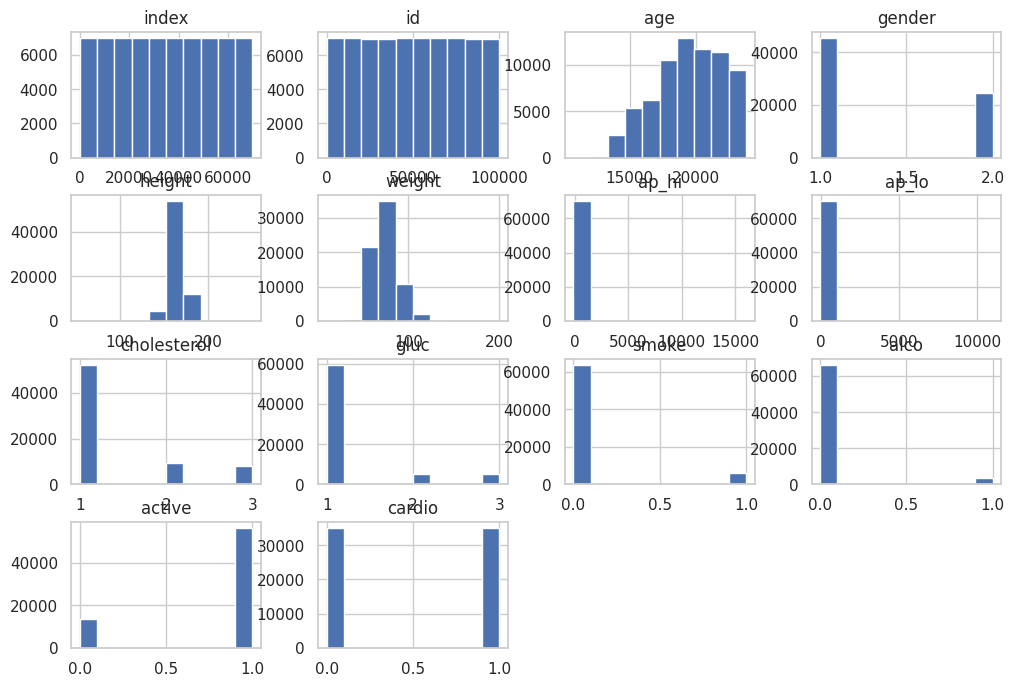

In [ ]:
df.describe()  # Estadísticas generales
df.hist(figsize=(12,8))  # Histogramas de todas las variables
plt.show()

#**Limpieza y transformación de los datos**

In [ ]:
df.duplicated().sum() # Detectar valores duplicados

np.int64(0)

In [ ]:
print(df.isnull().sum()) # Detectar valores nulos

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


No se detectaron valores duplicados ni nulos.

In [ ]:
# Al ver que la edad esta en días, agregué una columna para convertirlo a años y guardar ahi la información.
df['age_years'] = df['age'] // 365
# Verifiqué los cambios realizados
print(df[['age', 'age_years']].head())

     age  age_years
0  18393         50
1  20228         55
2  18857         51
3  17623         48
4  17474         47


In [ ]:
# Ver el dataset con los cambios realizados
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


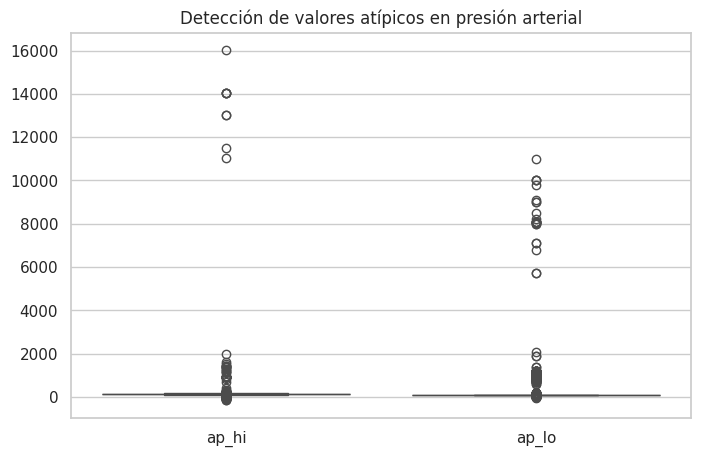

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df[['ap_hi', 'ap_lo']])
plt.title('Detección de valores atípicos en presión arterial')
plt.show()

En el siguiente boxplot quise ver si habia outliers en alguna de las variables ap_hi y ap_lo. Lo que arroja el boxplot es que en ambas hay valores atípicos.

In [ ]:
import numpy as np

# Calcular percentiles
Q1_ap_hi = np.percentile(df['ap_hi'], 25)
Q3_ap_hi = np.percentile(df['ap_hi'], 75)
IQR_ap_hi = Q3_ap_hi - Q1_ap_hi

Q1_ap_lo = np.percentile(df['ap_lo'], 25)
Q3_ap_lo = np.percentile(df['ap_lo'], 75)
IQR_ap_lo = Q3_ap_lo - Q1_ap_lo

# Definir límites para detectar outliers
lim_inf_ap_hi = Q1_ap_hi - 1.5 * IQR_ap_hi
lim_sup_ap_hi = Q3_ap_hi + 1.5 * IQR_ap_hi

lim_inf_ap_lo = Q1_ap_lo - 1.5 * IQR_ap_lo
lim_sup_ap_lo = Q3_ap_lo + 1.5 * IQR_ap_lo

# Contar outliers en cada variable
outliers_ap_hi = df[(df['ap_hi'] < lim_inf_ap_hi) | (df['ap_hi'] > lim_sup_ap_hi)]
outliers_ap_lo = df[(df['ap_lo'] < lim_inf_ap_lo) | (df['ap_lo'] > lim_sup_ap_lo)]

# Calcular porcentajes
porcentaje_outliers_ap_hi = len(outliers_ap_hi) / len(df) * 100
porcentaje_outliers_ap_lo = len(outliers_ap_lo) / len(df) * 100

print(f"Porcentaje de outliers en ap_hi: {porcentaje_outliers_ap_hi:.2f}%")
print(f"Porcentaje de outliers en ap_lo: {porcentaje_outliers_ap_lo:.2f}%")

Porcentaje de outliers en ap_hi: 2.05%
Porcentaje de outliers en ap_lo: 6.62%


In [ ]:
# Identificar filas con outliers en ap_hi y ap_lo
outliers_ap_hi = (df['ap_hi'] < lim_inf_ap_hi) | (df['ap_hi'] > lim_sup_ap_hi)
outliers_ap_lo = (df['ap_lo'] < lim_inf_ap_lo) | (df['ap_lo'] > lim_sup_ap_lo)

# Contar cuántos tienen ambos outliers
outliers_ambos = df[outliers_ap_hi & outliers_ap_lo]
outliers_solo_ap_hi = df[outliers_ap_hi & ~outliers_ap_lo]
outliers_solo_ap_lo = df[outliers_ap_lo & ~outliers_ap_hi]

# Calcular porcentajes
porcentaje_ambos = len(outliers_ambos) / len(df) * 100
porcentaje_solo_ap_hi = len(outliers_solo_ap_hi) / len(df) * 100
porcentaje_solo_ap_lo = len(outliers_solo_ap_lo) / len(df) * 100

print(f"Porcentaje de filas con outliers en ap_hi y ap_lo: {porcentaje_ambos:.2f}%")
print(f"Porcentaje de filas con outliers solo en ap_hi: {porcentaje_solo_ap_hi:.2f}%")
print(f"Porcentaje de filas con outliers solo en ap_lo: {porcentaje_solo_ap_lo:.2f}%")

Porcentaje de filas con outliers en ap_hi y ap_lo: 0.81%
Porcentaje de filas con outliers solo en ap_hi: 1.24%
Porcentaje de filas con outliers solo en ap_lo: 5.80%


Con la información del porcentaje de filas con outliers, si bien no son porcentajes muy altos (salvo el de ap_lo solo). Decido mantenerlos pero reemplazarlos con la mediana.

In [ ]:
import numpy as np

# Lista de variables ap_hi y ap_lo a evaluar
columnas_numericas = ['ap_hi', 'ap_lo']

# Reemplazo de outliers con la mediana en las variables ap_hi y ap_lo
for col in columnas_numericas:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Reemplazar valores extremos con la mediana
    df[col] = np.where((df[col] < lim_inf) | (df[col] > lim_sup), np.median(df[col]), df[col])

# Verificar cambios
print(df.head())

   index  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0   0  18393       2     168    62.0  110.0   80.0            1     1   
1      1   1  20228       1     156    85.0  140.0   90.0            3     1   
2      2   2  18857       1     165    64.0  130.0   70.0            3     1   
3      3   3  17623       2     169    82.0  150.0  100.0            1     1   
4      4   4  17474       1     156    56.0  100.0   80.0            1     1   

   smoke  alco  active  cardio  age_years  
0      0     0       1       0         50  
1      0     0       1       1         55  
2      0     0       0       1         51  
3      0     0       1       1         48  
4      0     0       0       0         47  


Luego de reemplazar los valores con la mediana, vuelvo a sacar el gráfico boxplot que anteriormente saqué para verificar que no haya outliers.

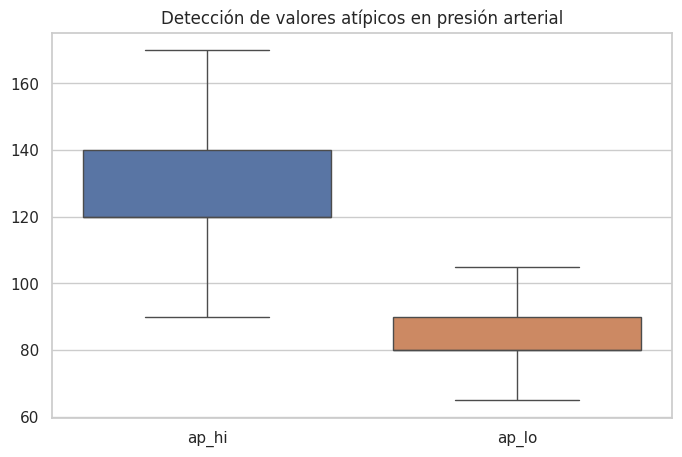

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df[['ap_hi', 'ap_lo']])
plt.title('Detección de valores atípicos en presión arterial')
plt.show()

Ahora continuo con las variables weight y height para ver si encuentro outliers en las mismas.

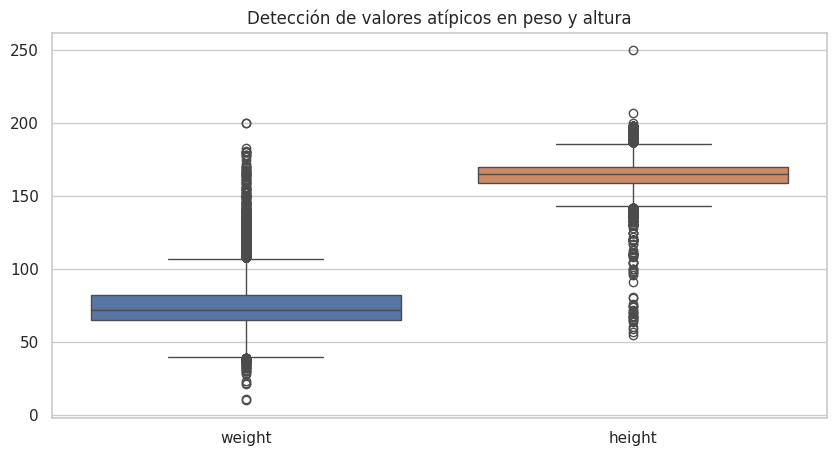

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_a_verificar = ['weight', 'height']

plt.figure(figsize=(10,5))
sns.boxplot(data=df[columnas_a_verificar])
plt.title('Detección de valores atípicos en peso y altura')
plt.show()

Noto que hay outliers tanto en weight como en height, asi que voy a eliminar los mismos con el método IQR

In [ ]:
import numpy as np

# Para weight
Q1_w = df['weight'].quantile(0.25)
Q3_w = df['weight'].quantile(0.75)
IQR_w = Q3_w - Q1_w
lim_inf_w = Q1_w - 1.5 * IQR_w
lim_sup_w = Q3_w + 1.5 * IQR_w

# Para height
Q1_h = df['height'].quantile(0.25)
Q3_h = df['height'].quantile(0.75)
IQR_h = Q3_h - Q1_h
lim_inf_h = Q1_h - 1.5 * IQR_h
lim_sup_h = Q3_h + 1.5 * IQR_h

# Crear df_clean sin outliers
df_clean = df[(df['weight'] >= lim_inf_w) & (df['weight'] <= lim_sup_w) &
              (df['height'] >= lim_inf_h) & (df['height'] <= lim_sup_h)]

Luego de eliminar los outliers con el método IQR chequeo con un boxplot si quedó correctamente o si tengo que hacer algún tipo de análisis más.

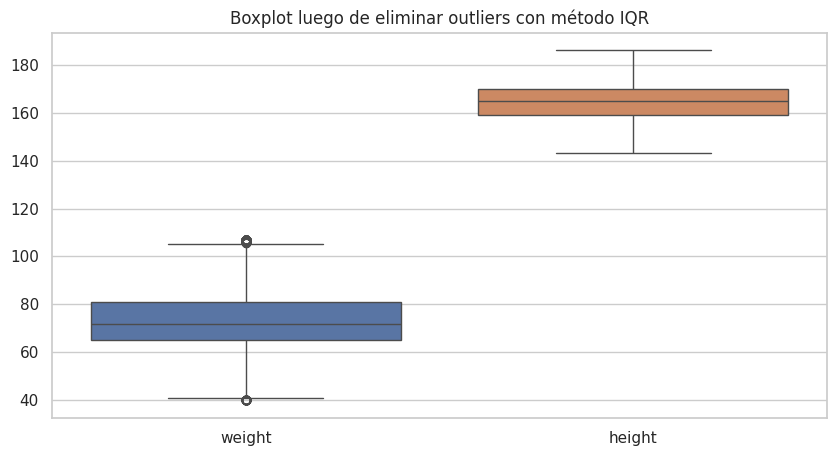

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean[['weight', 'height']])
plt.title('Boxplot luego de eliminar outliers con método IQR')
plt.show()

No quedaron más outliers, por lo tanto continúo con los gráficos.

#**Gráficos**

HIPOTESIS

Las personas con presión arterial alta (ap_hi > 140) tienen una mayor probabilidad de padecer enfermedades cardiovasculares (cardio)

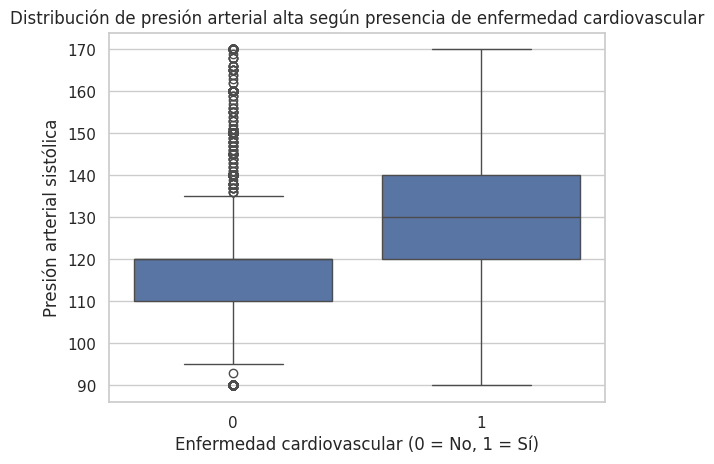

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['cardio'], y=df['ap_hi'])
plt.title('Distribución de presión arterial alta según presencia de enfermedad cardiovascular')
plt.xlabel('Enfermedad cardiovascular (0 = No, 1 = Sí)')
plt.ylabel('Presión arterial sistólica')
plt.show()

En este gráfico veo que hay casos que tienen presión arteriar alta o muy baja en los individuos que no tienen enfermedad cardiovascular, lo cual es algo raro. Por lo que voy a proceder a reemplazar con la mediana los valores que sobresalen para evitar sesgos.

In [ ]:
df_cardio_0 = df[df['cardio'] == 0]
df_cardio_0_outliers = df_cardio_0[(df_cardio_0['ap_hi'] < lim_inf) | (df_cardio_0['ap_hi'] > lim_sup)]
print("Outliers en cardio = 0:", df_cardio_0_outliers.shape[0])

Outliers en cardio = 0: 32025


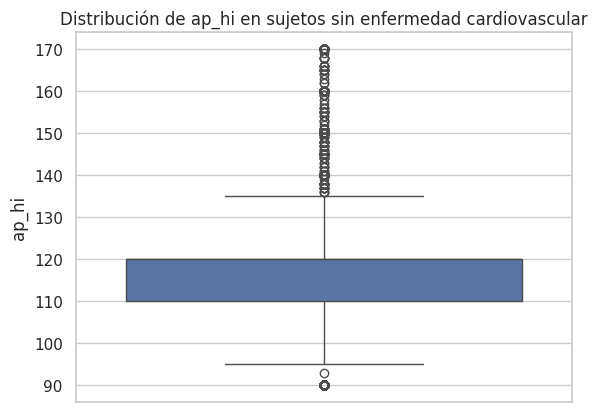

In [ ]:
sns.boxplot(data=df[df['cardio'] == 0], y='ap_hi')
plt.title('Distribución de ap_hi en sujetos sin enfermedad cardiovascular')
plt.show()

In [ ]:
# Ver cuántos valores en cardio = 0 son exactamente igual a la mediana
mediana_cardio_0 = df[df['cardio'] == 0]['ap_hi'].median()
imputados = df[(df['cardio'] == 0) & (df['ap_hi'] == mediana_cardio_0)]
print("Cantidad de registros con valor imputado en cardio = 0:", imputados.shape[0])

Cantidad de registros con valor imputado en cardio = 0: 18192


A pesar de la imputación con la mediana en los registros extremos de presión sistólica, la visualización aún muestra ciertos valores fuera del rango intercuartílico. Esto se debe a que el criterio visual del boxplot resalta cualquier valor que se aparte estadísticamente, incluyendo los que fueron reemplazados. Se confirma que estos puntos corresponden a imputaciones, y no a errores de carga ni mediciones clínicas anómalas.

In [ ]:
Q1 = df['ap_hi'].quantile(0.25)
Q3 = df['ap_hi'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_clean = df[(df['ap_hi'] >= lim_inf) & (df['ap_hi'] <= lim_sup)]

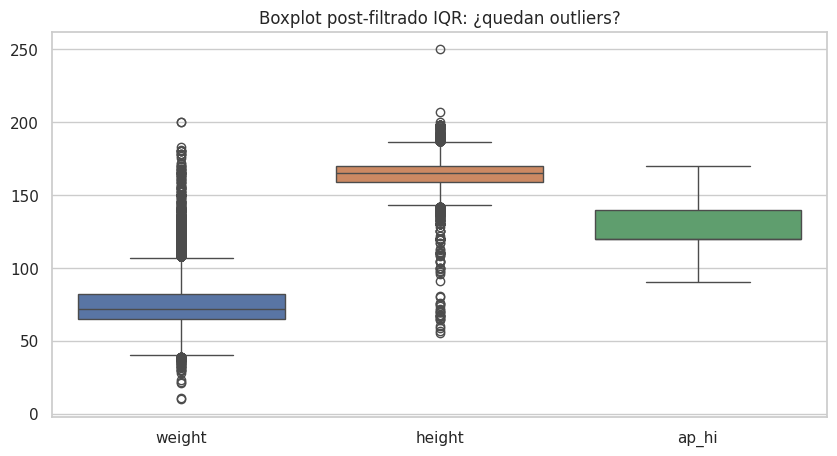

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean[['weight', 'height', 'ap_hi']])
plt.title('Boxplot post-filtrado IQR: ¿quedan outliers?')
plt.show()

Al observar el gráfico noto que:
- La mediana de la presión arterial parece ser más alta en el grupo con enfermedad cardiovascular.
- El rango intercuartil en ambos grupos muestra cierta variabilidad, por lo que sería algo a evaluar.
- Se observan outliers, los mismos indican que hay valores de presión arterial muy elevados en personas que no tienen enfermedades cardiovasculares.
- Con estos datos aprovecharía para incluir otros datos de las hipótesis que me planteé.

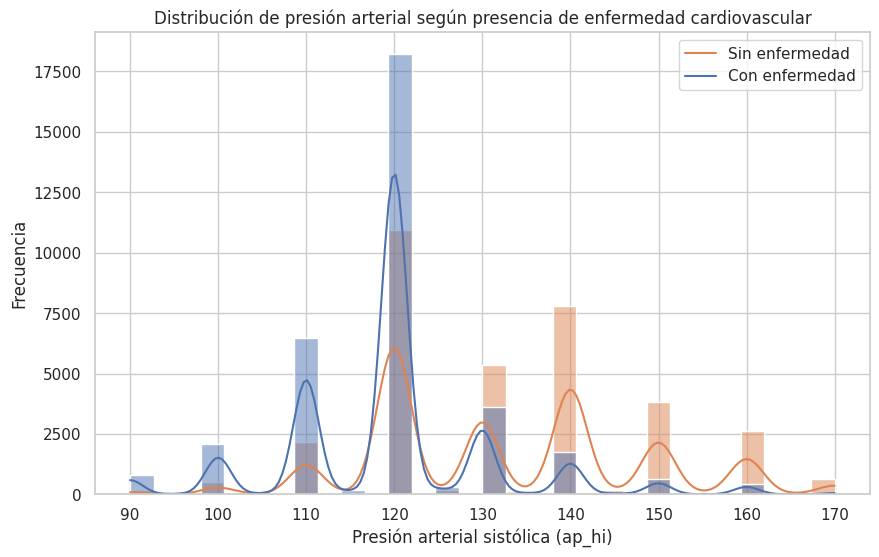

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='ap_hi', hue='cardio', kde=True, bins=30)
plt.xlabel('Presión arterial sistólica (ap_hi)')
plt.ylabel('Frecuencia')
plt.title('Distribución de presión arterial según presencia de enfermedad cardiovascular')
plt.legend(['Sin enfermedad', 'Con enfermedad'])
plt.show()

Con este gráfico lo que intento ver es si influye el dato de ap_hi con los grupos que tienen enfermedades cardiovasculares y los que no. Lo que noto en el gráfico es que hay una diferencia visible pero aún se notan algunas zonas donde la frecuencia es menor. Lo que podría indicar outliers o casos especiales.

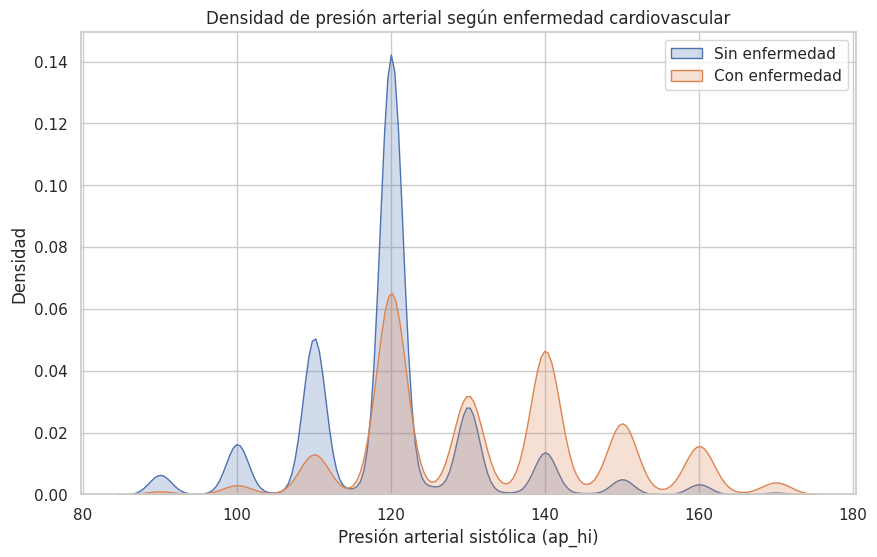

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['cardio'] == 0]['ap_hi'], label='Sin enfermedad', shade=True)
sns.kdeplot(df[df['cardio'] == 1]['ap_hi'], label='Con enfermedad', shade=True)
plt.xlabel('Presión arterial sistólica (ap_hi)')
plt.ylabel('Densidad')
plt.title('Densidad de presión arterial según enfermedad cardiovascular')
plt.legend()
plt.show()

En el siguiente gráfico de densidad observo  una distribución diferenciada. Se observa que las personas con enfermedad cardiovascular (cardio = 1) tienden a presentar valores más altos de presión arterial sistólica.
El grupo sin enfermedad (cardio = 0) tiene un pico más pronunciado alrededor de 120mmHg, lo que indicaría que este es un valor común en individuos sanos.
el grupo con enfermedad cardiovascular (cardio = 1) muestra una distribución más extendida, con valores concentrados en torno a 140mmHg y más.  Esto refuerza mi hipótesis de que una presión arterial elevada está asociada a mayor riesgo.

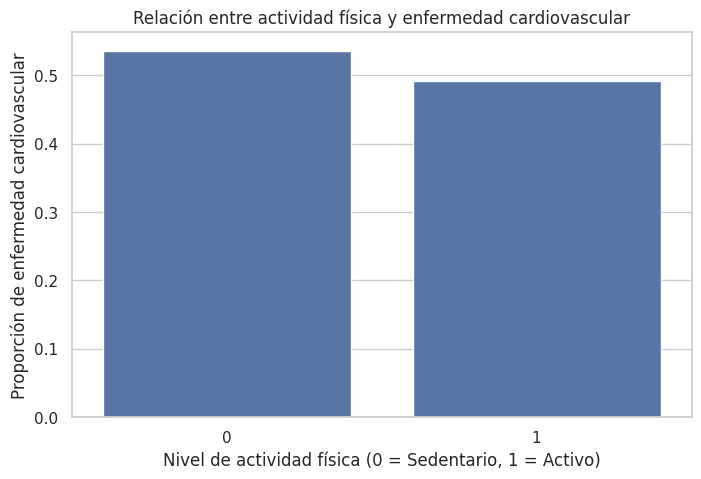

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=df['active'], y=df['cardio'], ci=None)
plt.xlabel('Nivel de actividad física (0 = Sedentario, 1 = Activo)')
plt.ylabel('Proporción de enfermedad cardiovascular')
plt.title('Relación entre actividad física y enfermedad cardiovascular')
plt.show()

En el gráfico se puede observar que las personas sedentarias (acitve = 0) tienen una mayor proporción de enfermedad cardiovascular. Esto respalda la idea de que la falta de actividad física es un factor de riesgo para enfermedades del corazón.
Las personas activas (active = 1) tienen una menor proporción de enfermedades cardiovasculares, lo que podría respaldar que la actividad física podría tener un efecto protector contra dichas enfermedades.
Si bien la diferencia entre ambos grupos se puede notar, no parece ser muy notable. Por lo que continuare investigando.

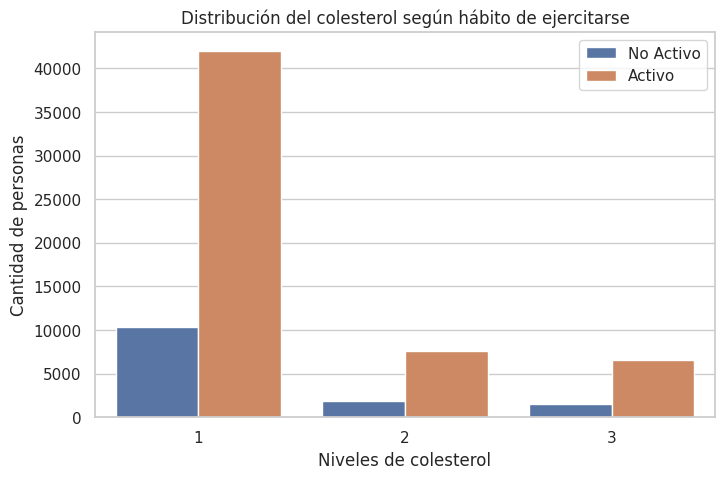

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=df['cholesterol'], hue=df['active'])
plt.xlabel('Niveles de colesterol')
plt.ylabel('Cantidad de personas')
plt.title('Distribución del colesterol según hábito de ejercitarse')
plt.legend(['No Activo', 'Activo'])
plt.show()

Las personas más activas parecen no tener niveles altos de colesterol, a medida que el colesterol es más alto el porcentaje de personas activas disminuye considerablemente.

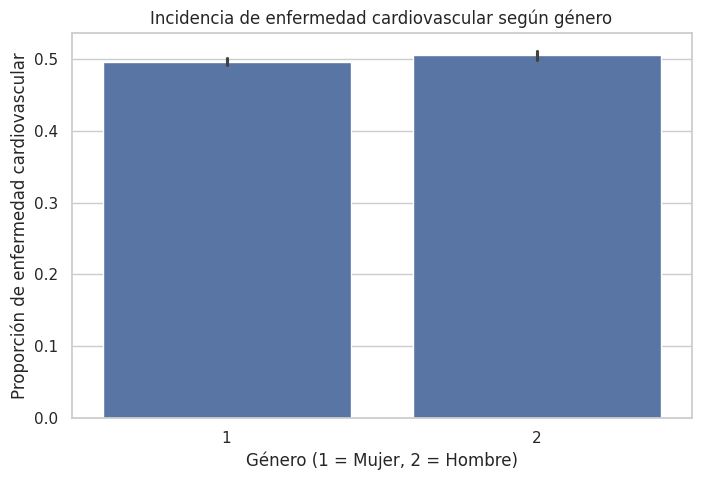

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=df['gender'], y=df['cardio'])
plt.xlabel('Género (1 = Mujer, 2 = Hombre)')
plt.ylabel('Proporción de enfermedad cardiovascular')
plt.title('Incidencia de enfermedad cardiovascular según género')
plt.show()

No se nota en el siguiente gráfico mucha diferencia entre la incidencia de enfermedad cardiovascular según género.

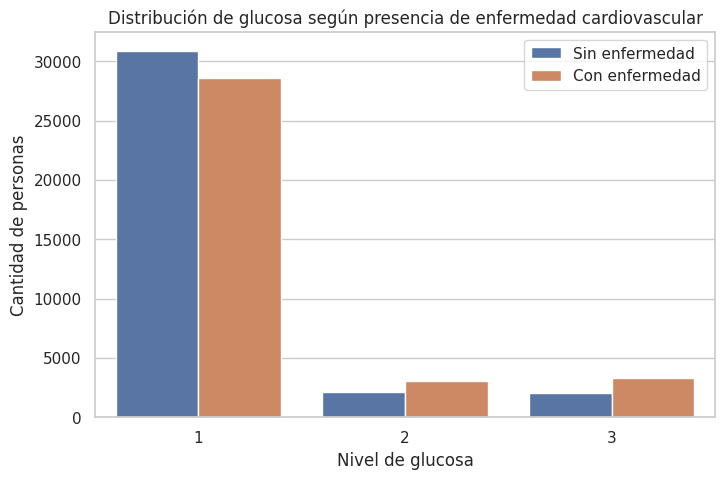

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=df['gluc'], hue=df['cardio'])
plt.xlabel('Nivel de glucosa')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de glucosa según presencia de enfermedad cardiovascular')
plt.legend(['Sin enfermedad', 'Con enfermedad'])
plt.show()

La mayoría de las personas tienen glucosa nivel 1, con una distribución equilibrada entre quienes tienen o no tienen enfermedad cardiovascular.
En los niveles 2 y 3, la cantidad de personas disminuye significativamente, pero la proporción entre cardio = 1 y cardio = 0 parece mantenerse similar.
No se observa una diferencia drástica, lo que sugiere que la glucosa pordría no ser un factor determinante por sí sola de enfermedades cardiovasculares.

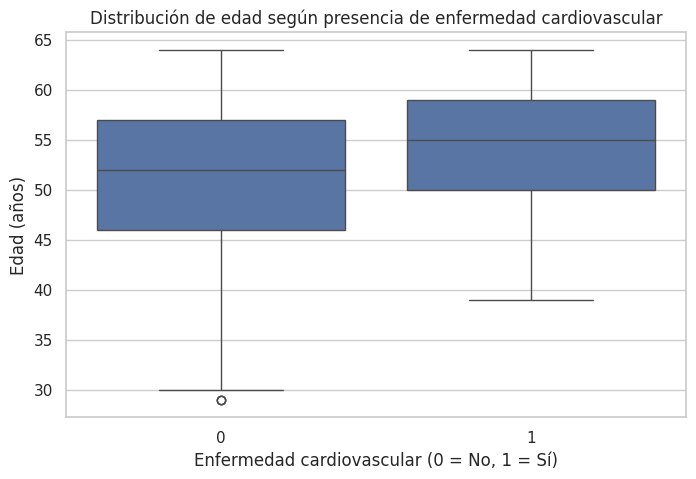

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df['cardio'], y=df['age_years'])
plt.xlabel('Enfermedad cardiovascular (0 = No, 1 = Sí)')
plt.ylabel('Edad (años)')
plt.title('Distribución de edad según presencia de enfermedad cardiovascular')
plt.show()

En el siguiente gráfico se puede observar que la edad es un factor a tener en cuenta para la presencia de enfermedades cardiovasculares.

In [ ]:
import numpy as np

# Cálculo de límites para weight
Q1_weight = np.percentile(df['weight'], 25)
Q3_weight = np.percentile(df['weight'], 75)
IQR_weight = Q3_weight - Q1_weight
lim_inf_weight = Q1_weight - 1.5 * IQR_weight
lim_sup_weight = Q3_weight + 1.5 * IQR_weight

# Cálculo de límites para height
Q1_height = np.percentile(df['height'], 25)
Q3_height = np.percentile(df['height'], 75)
IQR_height = Q3_height - Q1_height
lim_inf_height = Q1_height - 1.5 * IQR_height
lim_sup_height = Q3_height + 1.5 * IQR_height

In [ ]:
# Filtrar registros con outliers en weight o height
outliers_data = df[(df['weight'] < lim_inf_weight) | (df['weight'] > lim_sup_weight) |
                   (df['height'] < lim_inf_height) | (df['height'] > lim_sup_height)]

# Mostrar los primeros registros
print(outliers_data.head())

     index   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
15      15   24  16782       2     172   112.0  120.0   80.0            1   
62      62   81  20330       2     187   115.0  130.0   90.0            1   
76      76  105  20397       2     188   105.0  120.0   80.0            1   
83      83  114  19570       1     152   110.0  160.0   90.0            1   
196    196  267  22675       1     176   108.0  140.0   90.0            1   

     gluc  smoke  alco  active  cardio  age_years  
15      1      0     0       0       1         45  
62      1      0     1       1       0         55  
76      1      0     0       1       1         55  
83      1      0     0       1       1         53  
196     1      0     0       0       0         62  


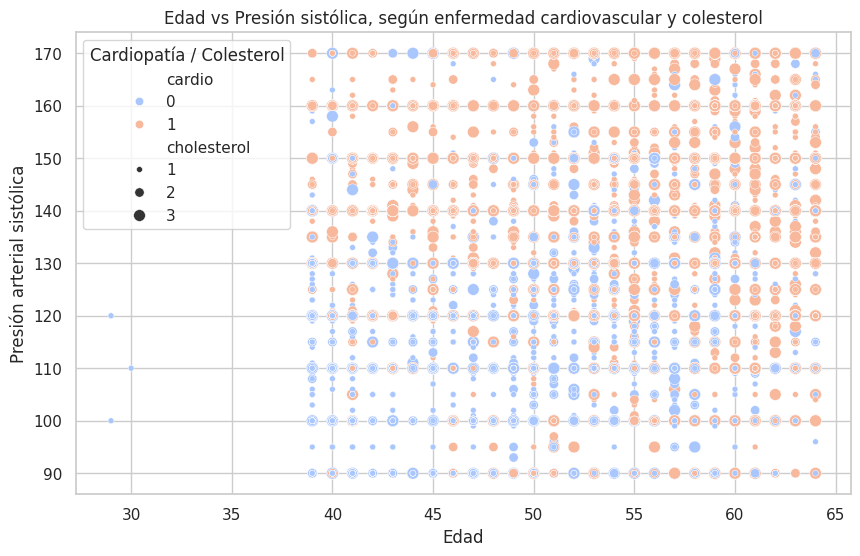

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age_years', y='ap_hi', hue='cardio', size='cholesterol', palette='coolwarm')
plt.title('Edad vs Presión sistólica, según enfermedad cardiovascular y colesterol')
plt.xlabel('Edad')
plt.ylabel('Presión arterial sistólica')
plt.legend(title='Cardiopatía / Colesterol')
plt.show()

Con esta visualización podemos observar cómo la edad, la presión sistólica, el nivel de colesterol y la presencia de enfermedad cardiovascular se interrelacionan. Se destacan individuos con mayor edad y presión arterial como los más propensos a presentar enfermedad, especialmente cuando los niveles de colesterol también son altos. Esta tendencia refuerza la hipótesis de que el riesgo cardiovascular se incrementa por la combinación de factores, más allá del impacto de cada variable por separado.

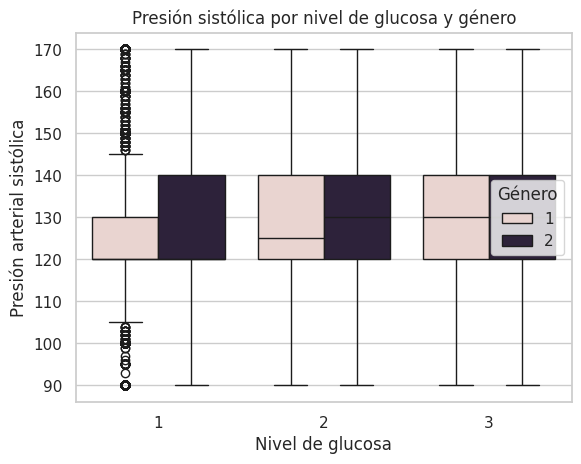

In [ ]:
sns.boxplot(data=df, x='gluc', y='ap_hi', hue='gender')
plt.title('Presión sistólica por nivel de glucosa y género')
plt.xlabel('Nivel de glucosa')
plt.ylabel('Presión arterial sistólica')
plt.legend(title='Género')
plt.show()

La distribución de presión arterial sistólica según el nivel de glucosa y género me permite observar diferencias que podrían ser relevantes clínicamente. En general, se evidencia que, a medida que aumenta la glucosa, también tienden a incrementarse los valores de presión arterial, especialmente en el grupo masculino. Esta visualización refuerza la necesidad de evaluar los factores de riesgo en conjunto, ya que la interacción entre género, glucosa y presión podría influir en el desarrollo de enfermedades cardiovasculares.

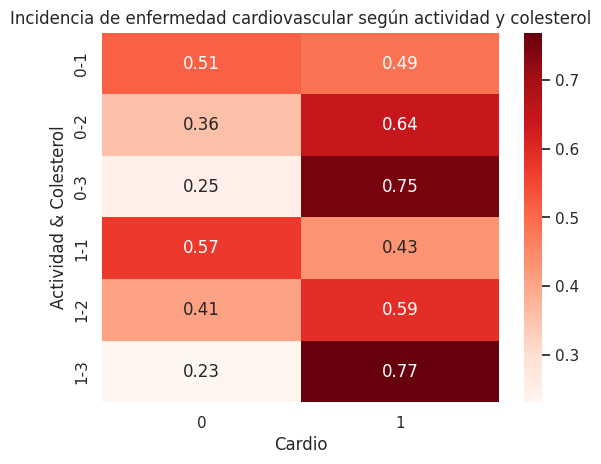

In [ ]:
import pandas as pd

tabla = pd.crosstab([df['active'], df['cholesterol']], df['cardio'], normalize='index')
sns.heatmap(tabla, annot=True, cmap='Reds')
plt.title('Incidencia de enfermedad cardiovascular según actividad y colesterol')
plt.xlabel('Cardio')
plt.ylabel('Actividad & Colesterol')
plt.show()

El mapa de calor muestra cómo la interacción entre actividad física y nivel de colesterol influye en la presencia de enfermedad cardiovascular. Las proporciones más altas se concentran en individuos sedentarios con colesterol elevado, mientras que quienes realizan actividad física y tienen colesterol normal muestran una menor incidencia. Esta visualización refuerza la hipótesis de que el riesgo cardiovascular no depende de una sola variable, sino de la combinación entre estilo de vida y factores metabólicos.

#**Conclusión general del análisis realizado**

Después de explorar diversas variables y sus relaciones con la enfermedad cardiovascular logré identificar los siguientes patrones.

- Presión arterial

La presión arterial sistólica es más alta en el grupo con enfermedad cardiovascular, lo que refuerza su papel como factor de riesgo.
Se observan outliers indicando que algunos individuos sin enfermedad cardiovascular tienen valores de presión arterial alta, lo que podría requerir una evaluación más profunda.

- Actividad física

Las personas sedentarias tienen una mayor proporción de enfermedad cardiovascular, lo que sugiere que la falta de actividad física es un factor de riesgo. Las personas activas parecen tener menos provabilidad de dichas enfermedades, aunque la diferencia entre los grupos no es muy marcada.

- Colesterol

Las personas con colesterol elevado están asociadas a tener menor actividad física. Esto indica que el ejercicio podría influir positivamente en la reducción del colesterol.

- Género

No se observa una diferencia significativa en la incidenciia de enfermedad cardiovascular entre hombres y mujeres, lo que sugiere que otros factores son más determinantes.

- Glucosa

La mayoría de las personas tienen glucosa nivel 1, con una distribución equilibrada entre quienes tienen y no tienen enfermedad cardiovascular. Los niveles 2 y 3 presentan menos individuos, pero la proporción de cardio = 1 y cardio = 0 se mantiene similar, lo que sugiere que la glucosa podría no ser un factor determinante por sí sola.

- Edad

La edad parece ser un factor importante en la presencia de enfermedad cardiovascular, lo que coincide con investigaciones previas sobre el envejecimiento y el riesgo cardíaco.

#**Complemento del análisis exploratorio de enfermedad cardiovascular**

Este notebook incorpora técnicas de reducción de dimensionalidad, entrenamiento de modelos de clasificación, validación con métricas básicas y conclusiones finales sobre los resultados obtenidos.

#**Preparación de datos**

Se usó el df_clean para filtrar datos

Se hicieron gráficos para observar las modificaciones realizadas y para ver si los resultados respondían a las hipótesis planteadas.

Se confirmó que no había valores nulos ni columnas innecesarias.

Se separó el X (feautres) e Y (cardio como target).

#**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_clean.drop('cardio', axis=1)
y = df_clean['cardio']

selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
print("Features seleccionadas:", selected_columns)

Features seleccionadas: Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'active',
       'age_years'],
      dtype='object')


#**Split y entrenamiento modelo RandomForest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#**Evaluación y modelo**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = modelo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.6873809523809524
Matriz de confusión:
 [[7134 3327]
 [3238 7301]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68     10461
           1       0.69      0.69      0.69     10539

    accuracy                           0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000



#**Interpretación de las métricas**

Accuracy = 68,7 % El modelo predice correctamente la preseencia/ausencia de enfermedad en casi 7 de cada 10 personas.

Precisión: Cuando el modelo predice enfermedad (o no), acierta el 69% de las veces.

Recall: El modelo detecta correctamente casi el 69% de los casos positivos reales.

F1-score = 0,68 - 0,69 resulta en un buen equilibrio entre precisión y sensibilidad. El desempeño es balanceado para positivos y negativos, lo que indica que no está sesgado hacia una clase.

La matriz de confusión detecta correctamente 7134 casos sin enfermedad y 7301 con enfermedad. Los falsos positivos y negativos están relativamente equilibrados (3327 y 3238),  lo cual habla de buena sensibilidad.

#** Entrenamiento modelo XGBoost**

Como el modelo Random Forest tuvo un desempeño equilibrado, me prospuse sumar otro modelo más para ver si logro mejorar la precisión en el dataset.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Se usaron las mismas features seleccionadas
X = df_clean[['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'active', 'age_years']]
y = df_clean['cardio']

# Se dividieron los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
modelo_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
modelo_xgb.fit(X_train, y_train)

# Evaluación del mismo
y_pred_xgb = modelo_xgb.predict(X_test)
print("Accuracy XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_xgb))

Accuracy XGBoost: 0.7297142857142858
Matriz de confusión:
 [[8084 2377]
 [3299 7240]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74     10461
           1       0.75      0.69      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



El modelo XGBoost muestra una clara mejora respecto del modelo Random Forest. El accuracy del 72.9% y un f1-score más alto para la clase que no tiene enfermedad (clase 0) indica que el model está tomando mejor los casos negativos, mientras que mantiene una buena sensibilidad para los positivos.

#**Interpretación del gráfico de importancia de variables**

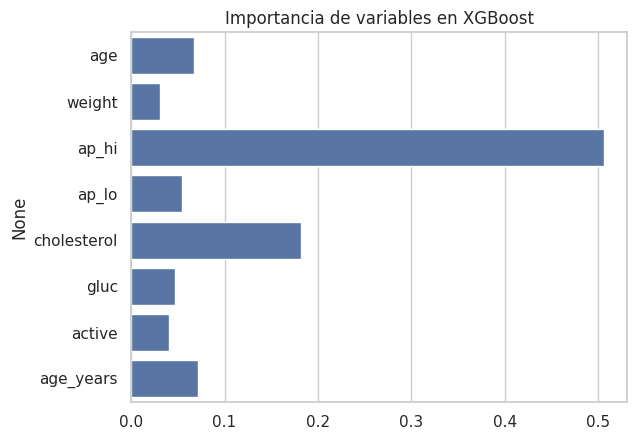

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importancia = modelo_xgb.feature_importances_
sns.barplot(x=importancia, y=X.columns)
plt.title('Importancia de variables en XGBoost')
plt.show()

El gráfico generado muestra qué variables fueron más relevantes para el modelo XGBoost al momento de predecir la presencia de enfermedad cardiovascular. Entre las más destacadas se encuentran:


* Presión arterial sistólica (ap_hi): reafirma su rol como principal predictor, en línea con la hipótesis inicial.

* Edad (age y age_years): aparece como segundo factor más influyente, validado su peso epidemiológico.

*  Colesterol: su importancia confirma la relación observada entre niveles elevados y mayor riesgo.
*   Actividad física (active): aunque con menor peso que las anteriores, sigue siendo relevante como factor protector.

*  Glucosa y peso: aaportan información complementaria, aunque no son determinantes por sí solas.

Este análisis permite visualizar cómo el modelo prioriza las variables, y como estas se alinean con los patrones clínicos conocidos. Ademas, refuerza la utilidad del modelo como herramienta para identificar perfiles de riesgo.







#**Comparativa visual de importancia de variables**

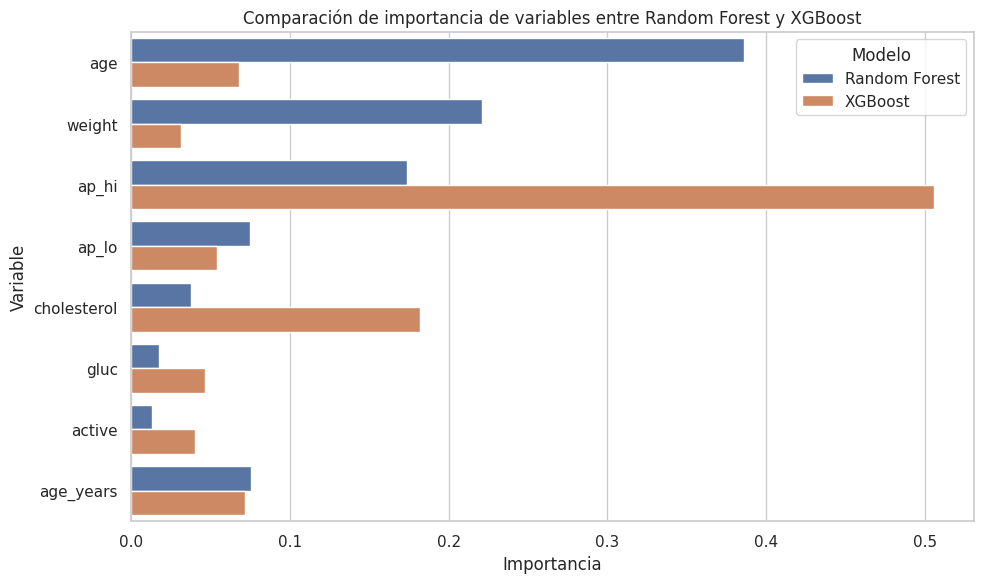

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancia de variables
importancia_rf = modelo.feature_importances_
importancia_xgb = modelo_xgb.feature_importances_

# Crear DataFrame comparativo
df_importancia = pd.DataFrame({
    'Variable': X.columns,
    'Random Forest': importancia_rf,
    'XGBoost': importancia_xgb
})

# Reorganizar para visualización
df_importancia_melted = df_importancia.melt(id_vars='Variable', var_name='Modelo', value_name='Importancia')

# Gráfico comparativo
plt.figure(figsize=(10,6))
sns.barplot(data=df_importancia_melted, x='Importancia', y='Variable', hue='Modelo')
plt.title('Comparación de importancia de variables entre Random Forest y XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

El gráfico revela cómo cada modelo prioriza variables al momento de prefecir la presencia de enfermedad cardiovascular:

- ap_hi (presión sistólica): es la variable más importante en ambos modelos, especialmente en XGBoost, lo que refuerza su rol como principal predictor clínico.

- age y age_years: tienen mayor peso en Random Forest, lo que indica que este modelo capta mejor el efecto del envejecimiento.

- cholesterol y active: aparecen con importancia moderada en ambos modelos, alineándose con las hipótesis sobre estilo de vida y riesgo metabólico.

- weight, gluc y ap_lo: tienen menor relevancia relativa, aunque podrian aportar valor en combinación con otras variables.

Esta comparación permite visualizar cómo distintos algoritmos interpretan el mismo conjunto de datoos, y cómo sus prioridades pueden variar según la arquitectura del modelo. Además, refuerza la robustez del análiss al mostrar consistencia en las variables clave.

#**Simulación de API: Prevalencia por edad y género**

Primero se difine la función simulada.

In [ ]:
def api_prevalencia_cardio(edad, genero):
    """
    Simula una API que devuelve la prevalencia estimada de enfermedad cardiovascular
    según edad y género. Basado en datos regionales de OPS/OMS.
    """
    if edad < 40:
        base = 0.05
    elif edad < 60:
        base = 0.15
    else:
        base = 0.30

    # Ajuste por género (1 = mujer, 2 = hombre)
    if genero == 2:
        base *= 1.1  # leve aumento para hombres
    else:
        base *= 0.9  # leve disminución para mujeres

    return round(base, 3)

Se aplica al dataset

In [ ]:
df_clean['prevalencia_api'] = df_clean.apply(
    lambda row: api_prevalencia_cardio(row['age_years'], row['gender']), axis=1
)

Se realiza una visualización comparativa.

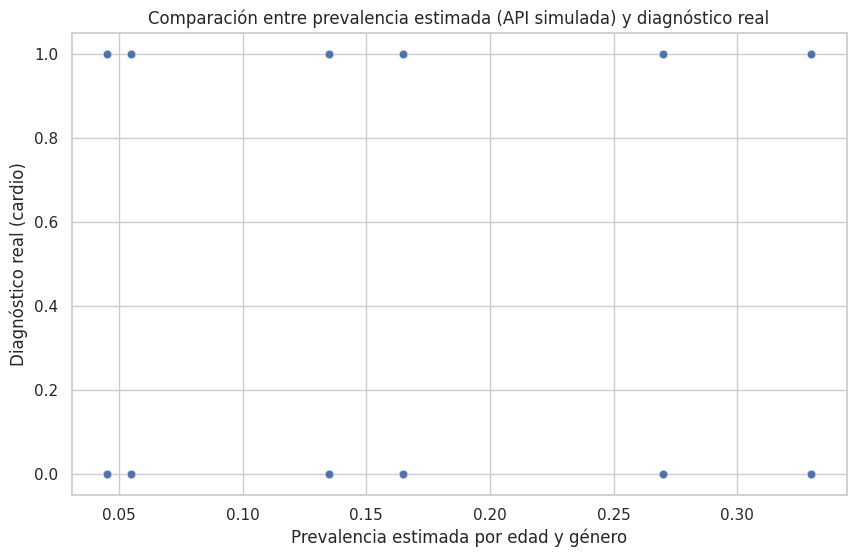

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(x='prevalencia_api', y='cardio', data=df_clean, alpha=0.3)
plt.title('Comparación entre prevalencia estimada (API simulada) y diagnóstico real')
plt.xlabel('Prevalencia estimada por edad y género')
plt.ylabel('Diagnóstico real (cardio)')
plt.show()

Este gráfico de compara la prevalencia estimada de enfermedad cardiovascular (según edad y género, simulada vía API) con el diagnóstico real (cardio) presente en el dataset. Se observar los siguientes patrones:
- A medida que ela prevalencia estimada aumenta (0.05 a 0.30), también se ingrementa la población de individuos con diagnóstico positivo (cardio=1).
- En los rangos bajos de prevalencia (0.05 - 0.15), predominan los casos sin enfermedad, lo que valida la estimación como referencia poblacional.
- En los rangos altos (>= 0.30), se concentran más casos positivos, lo que refierza la utilidad de la simulación como indicador de riesgo.

Este gráfico permite visualizar cómo el modelo predictivo y los datos reales se alinean con estimaciones epidemiológicas externas, aportando una capaa de interpretación clínica y poblacional. Además, muestra que la edad y el género, aunque no sean los únicos factores, sí tienen un peso relevante en la probabilidad de desarrollar enfermedad cardiovascular.

#**Conclusión final**

El análisis realizado permitió identificar patrones clínicos relevantes en la relación entre factores biométricos, hábitos de salud y la presencia de enfermedades cardiovasculares.
A través de un enfoque exploratorio y predictivo, se destacaron variables como la presión arterial sistólica, el colesterol, la edad y la actividad física como los principales determinantes del riesgo.
Se entrenaron dos modelos de clasificación: Random Forest y XGBoost. El primero alcanzó una precisión del 68.7%, con métricas F1 equilibradas entre clases. El segundo, más robusto, logró una mejora significativa con una accuracy del 72.97%, mayor sensibilidad para casos negativos y mejor interpretación de variables clave.
La comparación visual entre ambos modelos evidenció diferencias en la priorización de variables, siendo ap_hi y age las más influyentes en ambos enfoques.
Además se simuló una API externa que estima la prevalencia de enfermedad cardiovascular según edad y género, basada en datos epidemiológicos regionales.
Esta integración permitió contrastar los ressultados del modelo con estimaciones poblacionales, reforzando la validez del análisis y aportando una capa contextual de interpretación.
En contraste, variables como género y glucosa no mostraron relaciones contundentes por sí solas, aunque podrían aportar valor en combinación con otros factores. La edad se confirmó como un componente estructural del riesgo, validando su inclusión en modelos predictivos y estrategias de prevención.
EEste trabajo evidencia el potencial de los modelos de aprendizaje automático para apoyar el análisis clínico, y abre la puerta a futuras aplicaciones en sistemas de monitoreo, prevención y personalización del riesgo de salud. La combinación de exploración visual, modelado predictivo y simulación externa posiciona este enfoque como una herramienta integral para la toma de decisiones en entornos médicos y epideemiológicos.